# Nepali OCR detector.

In [4]:
path ="/content/drive/MyDrive/documents/front.jpeg"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## importing Module

In [6]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 36.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [7]:

import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

## Loading pre trained model.

'ne' for Nepali and 'en' for english and simillary for other

In [8]:
reader = easyocr.Reader(['ne']) #'ne' for Nepali and 'en' for english and simillary for other

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## Normal image to Scaned image

In [9]:
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):

    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



> Enter the location of image file

In [ ]:
loc="2.jpg"

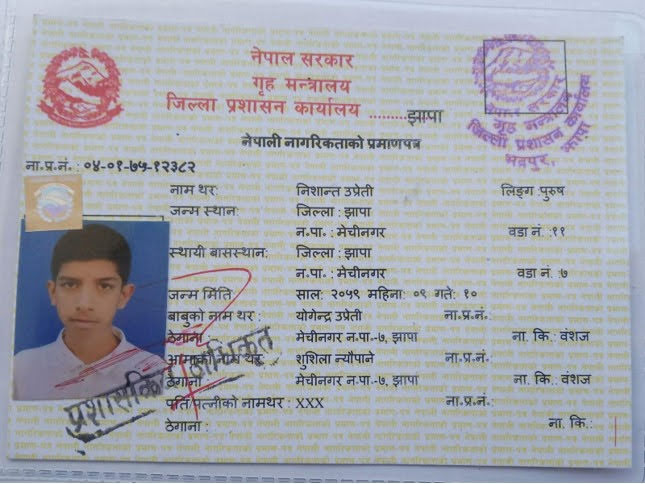

In [10]:

Image(path)

In [12]:
img = cv2.imread(path)
image = scan_effect(img)
#from google.colab.patches import cv2_imshow
#cv2_imshow(image)
filename = 'scanned.jpg'
cv2.imwrite(filename, image)

True

## Loading Image

In [27]:
path=filename

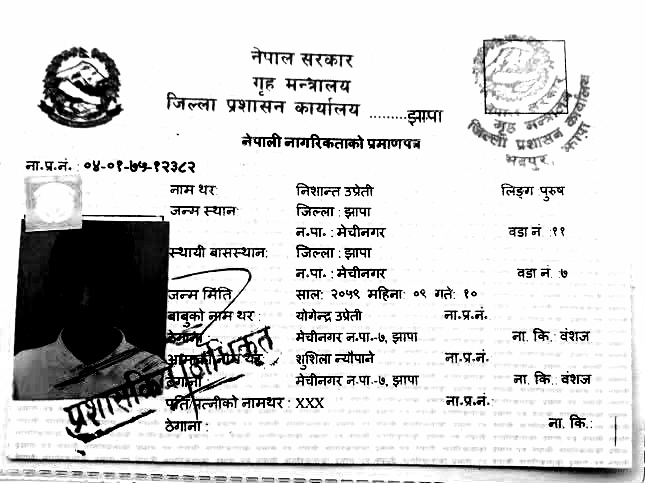

In [14]:

Image(path)

## Detecting character from image

In [15]:
output = reader.readtext(path)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


## Output

In [16]:
output

[([[299, 49], [355, 49], [355, 69], [299, 69]], 'सरकार', 0.8795070141885708),
 ([[248, 74], [354, 74], [354, 98], [248, 98]],
  'गृह मन्य्रालय',
  0.5350420379529349),
 ([[221, 93], [364, 93], [364, 120], [221, 120]],
  'प्रशासन कार्यालय',
  0.5218602874580548),
 ([[403, 107], [445, 107], [445, 127], [403, 127]],
  'झापा',
  0.8012206969069829),
 ([[491, 121], [519, 121], [519, 137], [491, 137]], 'ष', 0.28286922013423066),
 ([[237, 126], [424, 126], [424, 155], [237, 155]],
  'नेपाली नागरिकताको प्रमाणपन',
  0.7562172888816387),
 ([[25, 157], [75, 157], [75, 173], [25, 173]],
  'नःप्रःनं.',
  0.19118780060351476),
 ([[82, 158], [198, 158], [198, 176], [82, 176]],
  '04-0?-6+-1२3<२',
  0.049116305228398126),
 ([[169, 183], [219, 183], [219, 197], [169, 197]],
  'नाम थरः',
  0.876751631859478),
 ([[295, 181], [377, 181], [377, 199], [295, 199]],
  'निशान्त उप्रेती',
  0.484413797947268),
 ([[500, 182], [568, 182], [568, 206], [500, 206]],
  'लिङ्ग  पुरुष',
  0.3766638024019483),
 ([[203, 

## Total detection

In [17]:
print(f'Total number of detection',len(output))

Total number of detection 48


## Previewing Output

सरकार
गृह मन्य्रालय
प्रशासन कार्यालय
झापा
ष
नेपाली नागरिकताको प्रमाणपन
नःप्रःनं.
04-0?-6+-1२3<२
नाम थरः
निशान्त उप्रेती
लिङ्ग  पुरुष
स्यान
जिल्ला
झापा
न.पा.
मेचीनगर
वडा नं
स्थाया बासस्थानः
जिल्ला
झापा
नःपाः
मेचीनगर
वडा न. :७
जन्म मिति
पालः
२०५२
महिनाः
गतः
जम थर
यागन्द्र उप्रता
नाःप्रःनं
मेचीनगर नःपा -७ झापा
ना. कि ः वंशज
शुशिला न्योपाने
नाःप्रःन.
मचानगर नःपा.-७ झाण
ना. कि
उशज
त्जीका नामथर
१ञ
ना.प नं.
ठगना
ना.कि
नेपाल
जिल्ला
पिशासन
मरप ~
गन्म


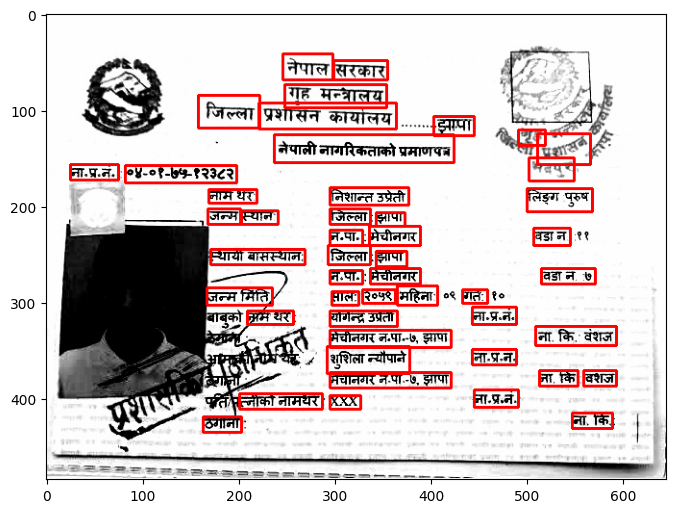

In [18]:
image = cv2.imread(path)
for i in range(len(output)):
  cord = output[i][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
  print(output[i][1])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
!pip install pyocr
!pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.1 MB/s eta 0:00:00


In [22]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!apt-get install tesseract-ocr-nep



Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,685 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.

In [23]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [24]:
path ="/content/drive/MyDrive/documents/front.jpeg"

In [28]:
import pyocr
import pyocr.builders
from PIL import Image
import io

# Locate Tesseract and the OCR tool
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    exit(1)
tool = tools[0]

# Ensure Tesseract is using the correct language data
lang = 'nep'  # Nepali language code

img = Image.open(path)

# Perform OCR on the image
text = tool.image_to_string(
    img,
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)

print("Recognized Text:")
print(text)


Recognized Text:
नेपाल सरकार
गृह मन्त्रालय
जिल्ला प्रशासन कार्यालय ... “झापा

नेपाली नागरिकताको प्रमाणपत्र

   

ना-प्र.नं. : ०४-०१-७५-१२३८२

   
 
 
 
 
 
  
 
 
 

नाम धर निशान्त उप्रेती लिङ्ग पुरुष
जन्म स्थानः जिल्ला : झापा

ननपा : मेचीनगर वडाने ११
स्थायी बासस्थान: जिल्ला: झापा

न.पा. : मेचीनगर वडाने ७

सालः २०५९ महिना: ०९ गते: १०

योगेन्द्र उप्रेती ना.प्रनने-

मेचीनगर न.पा--७, झापा ना. कि. वेशज

शुशिला न्यौपाने ना-प्रन्ने-

मेचीनगर न-पा.-७, झापा ना. कि.. वंशज

नामथर: 9006 ना-प्रन्न-
ना. कि.
